In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
print(iris.feature_names)
target_names = iris.target_names
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target)

In [10]:
print(f"Number of trainining samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Number of trainining samples: 112
Number of test samples: 38


# Learn the classifier

In [14]:
cls = KNeighborsClassifier()
cls.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred = cls.predict(X_test)

In [20]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9737


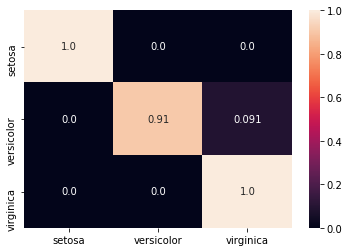

In [32]:
conf_mat = confusion_matrix(Y_test, y_pred)
conf_mat = conf_mat/np.sum(conf_mat, axis=1, keepdims=True)
sns.heatmap(conf_mat, fmt='.2', annot=True, xticklabels=target_names, yticklabels=target_names)

# Custom KNN classifier

In [60]:
class CustomKNN:
    def fit(self, X_train, Y_train, K=1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.K = 1
    
    def predict_single_sample(self, X):
        dist = np.sum(((self.X_train - X)**2), axis=1)
        smalldist_idx = np.argmin(dist)
        return self.Y_train[smalldist_idx]
    
    def predict(self, X_test):
        Y_predict = []
        for X in X_test:
            Y_predict.append(self.predict_single_sample(X))
        return Y_predict

In [64]:
cls = CustomKNN()
cls.fit(X_train, Y_train)

In [65]:
Y_predict = cls.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000
